In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/merged-data/merged_twitter.csv


In [2]:
df = pd.read_csv('/kaggle/input/merged-data/merged_twitter.csv')

In [3]:
df.head(15)

,selected_text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD,negative
2,bullying me,negative
3,leave me alone,negative
4,"Sons of ****,",negative
5,http://www.dothebouncy.com/smf - some shameles...,neutral
6,fun,positive
7,Soooo high,neutral
8,Both of you,neutral
9,Wow... u just became cooler.,positive


In [4]:
len(df)

190461

In [5]:
print(df.isnull().sum())


selected_text    68
sentiment         7
dtype: int64


In [6]:
df_dropped = df.dropna(inplace = True)

In [7]:
print(df.isnull().sum())


selected_text    0
sentiment        0
dtype: int64


In [8]:
df['sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [9]:
df.groupby('sentiment').nunique()

,selected_text
sentiment,
negative,40792
neutral,64190
positive,76393


In [10]:
df = df[['selected_text', 'sentiment']]
print(df.head(10))
print(df.tail(10))

                                       selected_text sentiment
0                I`d have responded, if I were going   neutral
1                                           Sooo SAD  negative
2                                        bullying me  negative
3                                     leave me alone  negative
4                                      Sons of ****,  negative
5  http://www.dothebouncy.com/smf - some shameles...   neutral
6                                                fun  positive
7                                         Soooo high   neutral
8                                        Both of you   neutral
9                       Wow... u just became cooler.  positive
                                            selected_text sentiment
190451  raga knows dat wont spared modi courts cheatin...  positive
190452  congress veteran sudhakar reddy joins bjp meet...   neutral
190453  engine growth modi unveils indias first 12000 ...  positive
190454  modi promised 2014 lok sabh

In [11]:
df['selected_text'].isnull().sum()

0

In [12]:
df['selected_text'].fillna("No content", inplace = True)
print("Done")

Done


/tmp/ipykernel_33/2882932491.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['selected_text'].fillna("No content", inplace = True)


In [13]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

def preprocess_text(texts):
    preprocessed_texts = []
    stop_words = set(stopwords.words('english'))
    
    for text in texts:
        # Remove HTML tags
        text = BeautifulSoup(text, 'html.parser').get_text()

        # Remove URLs
        text = re.sub(r'https?://[A-Za-z0-9./]+', '', text)

        # Tokenize text
        tokenizer = TweetTokenizer()
        tokens = tokenizer.tokenize(text)

        # Remove emails
        tokens = [token for token in tokens if not re.match(r'\S+@\S+', token)]

        # Remove new lines characters
        tokens = [token for token in tokens if token != '\n']

        # Remove distracting single quotes
        tokens = [token.replace("'", "") for token in tokens]

        # Remove all punctuation signs and stopwords
        tokens = [token.lower() for token in tokens if token.isalnum() and token.lower() not in stop_words]

        # Detokenize text
        preprocessed_texts.append(' '.join(tokens))

    return np.array(preprocessed_texts)
# Preprocess 'tweet' column
df['selected_text'] = preprocess_text(df['selected_text'])

print(df)

df['sentiment'] = df['sentiment'].replace({'negative': 0, 'positive': 1, 'neutral': 2})

max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['selected_text'])

with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

# Print the first most frequent words


sequences = tokenizer.texts_to_sequences(df['selected_text'])
X = pad_sequences(sequences, maxlen=max_len)

# Convert sentiment column to numpy array
y = np.array(df['sentiment'])

print(X)


2024-04-13 17:02:57.857297: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-13 17:02:57.857487: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-13 17:02:58.021821: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/tmp/ipykernel_33/2241134619.py:16: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


                                            selected_text sentiment
0                                         responded going   neutral
1                                                sooo sad  negative
2                                                bullying  negative
3                                             leave alone  negative
4                                                    sons  negative
...                                                   ...       ...
190456  456 crores paid neerav modi recovered congress...  negative
190457  dear rss terrorist payal gawar modi killing 10...  negative
190458                       cover interaction forum left   neutral
190459  big project came india modi dream project happ...   neutral
190460  ever listen like gurukul discipline maintained...  positive

[190386 rows x 2 columns]


/tmp/ipykernel_33/2241134619.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentiment'] = df['sentiment'].replace({'negative': 0, 'positive': 1, 'neutral': 2})


[[   0    0    0 ...    0 4246   74]
 [   0    0    0 ...    0 3977  442]
 [   0    0    0 ...    0    0    0]
 ...
 [   0    0    0 ... 1574 2600  295]
 [   0    0    0 ...  474  284  526]
 [   0    0    0 ...   50  386  111]]


In [14]:
print(y)

[2 0 0 ... 2 2 1]


In [15]:
from sklearn.model_selection import train_test_split

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Train set size:", len(X_train))
print("Test set size:", len(X_test))
print("Train labels size:", len(y_train))
print("Test labels size:", len(y_test))

Train set size: 152308
Test set size: 38078
Train labels size: 152308
Test labels size: 38078


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Define your neural network model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128))  # Increased output_dim
model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3))    # Increased LSTM units and dropout
model.add(Dense(64, activation='relu'))                     # Added a dense layer
model.add(Dropout(0.5))                                     # Added dropout for regularization
model.add(Dense(3, activation='softmax'))

# Compile your model with a lower learning rate
optimizer = Adam(learning_rate=0.0005)  # Adjusted learning rate
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

filepath = "best_model.keras"

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Train your model with the ModelCheckpoint callback
history = model.fit(X_train, y_train, batch_size=64, epochs=15, validation_split=0.2, callbacks=[checkpoint])

# Evaluate your model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/15
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.6643 - loss: 0.7664
Epoch 1: val_accuracy improved from -inf to 0.85868, saving model to best_model.keras
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 576s 301ms/step - accuracy: 0.6644 - loss: 0.7663 - val_accuracy: 0.8587 - val_loss: 0.4317
Epoch 2/15
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.8630 - loss: 0.4220
Epoch 2: val_accuracy improved from 0.85868 to 0.87440, saving model to best_model.keras
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 617s 298ms/step - accuracy: 0.8630 - loss: 0.4220 - val_accuracy: 0.8744 - val_loss: 0.3838
Epoch 3/15
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.8790 - loss: 0.3761
Epoch 3: val_accuracy improved from 0.87440 to 0.87890, saving model to best_model.keras
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 567s 298ms/step - accuracy: 0.8790 - loss: 0.3761 - val_accuracy: 0.8789 - val_loss: 0.3703
Epoch 4/15
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.8872 - loss: 0.3472
Epoch 4

In [17]:
model.save("best_modelLSTM.h5")

In [20]:
from tensorflow.keras.models import load_model
loaded_model = load_model("/kaggle/working/best_model.keras")

In [21]:
loaded_model.save("best_modelLSTM1.h5")

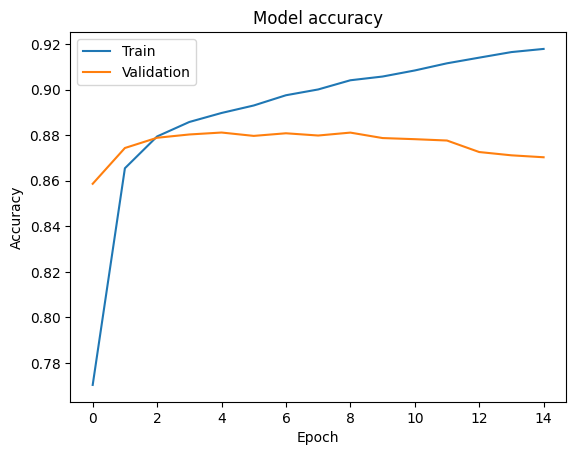

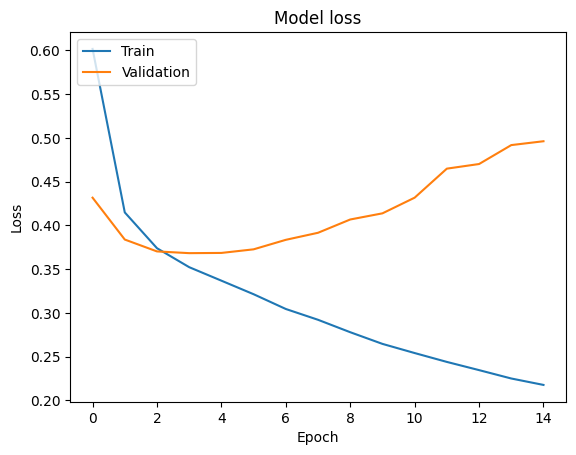

1190/1190 ━━━━━━━━━━━━━━━━━━━━ 98s 82ms/step
Confusion Matrix:
[[ 7008   843   875]
 [  908 13987  1154]
 [  588   540 12175]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      8726
           1       0.91      0.87      0.89     16049
           2       0.86      0.92      0.89     13303

    accuracy                           0.87     38078
   macro avg       0.86      0.86      0.86     38078
weighted avg       0.87      0.87      0.87     38078



In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Predict labels for test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Print classification report
print("Classification Report:")
print(class_report)
